# SBC 2024 Mid Season Review

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.axes as ax

## We are reviewing all SBC Batters with at least 75 Plate Appearances. We will be reviewing 3 sets of data: No Splits, Batters vs. RHP, Batters vs. LHP

In [107]:
dframe = pd.read_csv('sim_seasons.csv')

## We will be looking at a variety of statistics in this analysis. It's important to group them accordingly up front, and define what we are going to include in each. 

### Basic Batting Statistics
-  Position (POS)
-  Name (NAME)
-  Team (TEAM)
-  Handedness (HAND)
-  Games Started (GS)
-  Plate Appearances (PA)
-  At Bats(AB)
-  Doubles (2B)
-  Triples (3B)
-  Homeruns (HR)
-  Runs Batted in (RBI)
-  Walk Rate (BB%)
-  Strike Out Rate (SO%)
-  Average (AVG)
-  On Base Percent (OBP)
-  Slugging (SLG)

In [113]:
#List of Basic Stats
basic = ['POS','Fname', 'Lname','TM', 'B', 'GS', 'PA', 'AB','1B','2B', '3B', 'HR', 'RBI', 'R', 'BB', 'SO', 'AVG', 'OBP', 'SLG']
composite = ('CON', 'GAP', 'POW', 'EYE', 'K', 'AVG', 'OBP', 'SLG')
all_ratings = ('Fname', 'Lname', 'POS', 'CON', 'GAP', 'POW', 'EYE', 'K', 'AVG', 'OBP', 'SLG')
metrics = ('Fname', 'Lname','POS', 'TM', 'B', 'EXP', 'AVG', 'OBP', 'SLG', 'ISO', 'BABIP', 'wRC+', 'WAR', 'SLR')
speed = ('Fname', 'Lname','POS', 'TM', 'GS', 'BB', 'IBB', 'HP', 'H', 'SB', 'CS', 'AVG', 'OBP', 'SLG')

In [114]:
eval_basic = dframe.loc[:,basic]
eval_composite = dframe.loc[:,composite]
eval_all_ratings = dframe.loc[:,all_ratings]
eval_metrics = dframe.loc[:,metrics]
eval_speed = dframe.loc[:,speed]

### Let's get a quick view of the frames to ensure we captured all frames

## Investigating the relationship between Batter Ratings and Statistics

Defining the scope of what we want to evaluate is important. Id like to start by looking at the basic comparison statistics. A couple things of note: The players were selected exclusively with 75+ PA to eliminate outliers. 

#### We will begin by first creating the dataset to evaluate Ratings vs. Statistics. 

In [117]:
eval_all_ratings.sort_values(by='AVG', ascending=False).head()

,Fname,Lname,POS,CON,GAP,POW,EYE,K,AVG,OBP,SLG
1764,Pavin,Smith,1B,18,15,10,15,14,0.373,0.441,0.615
191,Ronald,Acuna,LF,15,15,13,13,12,0.364,0.421,0.620
425,Ryan,McMahon,1B,14,15,12,11,10,0.361,0.421,0.603
2505,Vladimir,Guerrero,3B,20,12,15,12,14,0.358,0.416,0.668
2852,Vladimir,Guerrero,3B,20,12,15,12,14,0.358,0.416,0.671


In [118]:
eval_all_ratings.count()

Fname    3056
Lname    3056
POS      3056
CON      3056
GAP      3056
POW      3056
EYE      3056
K        3056
AVG      3056
OBP      3056
SLG      3056
dtype: int64

#### Let's take a look at the mean of the ratings and statistics of SBC batters

In [120]:
eval_all_ratings.mean().round(3)


CON    11.165
GAP    11.604
POW    11.087
EYE    11.081
K      10.092
AVG     0.258
OBP     0.330
SLG     0.430
dtype: float64

#### Now to review the correlation heatmap to give us some insight. 

It's very difficult to know what rating affects batters statistics. This heatmap will give us some insight into this. 

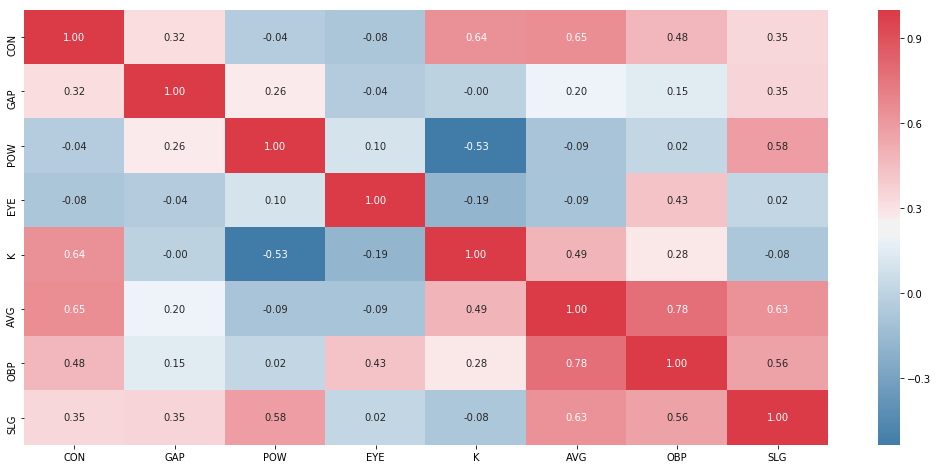

In [121]:
# Create the Datafame for correlation for our test dataset
corr = eval_all_ratings.corr()

# Create the layout for our graph
fig, ax = plt.subplots(figsize=(18,8))

# Style the graph to allow us to visually see the strength of the correlation
colormap = sns.diverging_palette(600,10, as_cmap=True)

# Construct the heatmap, including annotations, with a fixed 2 decimal places.
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")

## Time to work on some composite stats. 

### We will focus primarily on average to get our models down, and then implement for further investigation for OBP/SLG.

In [123]:
a = eval_composite.assign(CG = lambda eval_composite: eval_composite.CON + eval_composite.GAP)
b = a.assign(CP = lambda eval_composite: eval_composite.CON + eval_composite.POW)
c = b.assign(CE = lambda eval_composite: eval_composite.CON + eval_composite.EYE)
d = c.assign(CK = lambda eval_composite: eval_composite.CON + eval_composite.K)
e = d.assign(CGP = lambda eval_composite: eval_composite.CON + eval_composite.GAP + eval_composite.POW)
f = e.assign(CGE = lambda eval_composite: eval_composite.CON + eval_composite.GAP + eval_composite.EYE)
g = f.assign(CGK = lambda eval_composite: eval_composite.CON + eval_composite.GAP + eval_composite.K)
h = g.assign(CPE = lambda eval_composite: eval_composite.CON + eval_composite.POW + eval_composite.EYE)
i = h.assign(CPK = lambda eval_composite: eval_composite.CON + eval_composite.POW + eval_composite.K)
j = i.assign(CEK = lambda eval_composite: eval_composite.CON + eval_composite.EYE + eval_composite.K)
k = j.assign(CGPE = lambda eval_composite: eval_composite.CG + eval_composite.POW + eval_composite.EYE)
l = k.assign(CGPK = lambda eval_composite: eval_composite.CG + eval_composite.POW + eval_composite.K)
m = l.assign(CGEK = lambda eval_composite: eval_composite.CG + eval_composite.EYE + eval_composite.K)
n = m.assign(CGPEK = lambda eval_composite: eval_composite.CGPK + eval_composite.EYE)

eval_composite = n
eval_composite.count()


CON      3056
GAP      3056
POW      3056
EYE      3056
K        3056
AVG      3056
OBP      3056
SLG      3056
CG       3056
CP       3056
CE       3056
CK       3056
CGP      3056
CGE      3056
CGK      3056
CPE      3056
CPK      3056
CEK      3056
CGPE     3056
CGPK     3056
CGEK     3056
CGPEK    3056
dtype: int64

In [125]:
eval_composite = eval_composite[['CON','GAP','POW','EYE','K','CG','CP','CE','CK','CGP','CGE','CGK','CPE','CPK','CEK','CGPE','CGPK','CGEK','CGPEK','AVG', 'OBP', 'SLG']]
eval_composite.head()

,CON,GAP,POW,EYE,K,CG,CP,CE,CK,CGP,...,CPE,CPK,CEK,CGPE,CGPK,CGEK,CGPEK,AVG,OBP,SLG
0,15,15,18,16,8,30,33,31,23,48,...,49,41,39,64,56,54,72,0.265,0.394,0.542
1,15,14,18,17,8,29,33,32,23,47,...,50,41,40,64,55,54,72,0.277,0.406,0.536
2,15,15,18,17,8,30,33,32,23,48,...,50,41,40,65,56,55,73,0.282,0.410,0.520
3,14,13,15,18,8,27,29,32,22,42,...,47,37,40,60,50,53,68,0.238,0.358,0.450
4,14,14,15,17,8,28,29,31,22,43,...,46,37,39,60,51,53,68,0.280,0.389,0.524


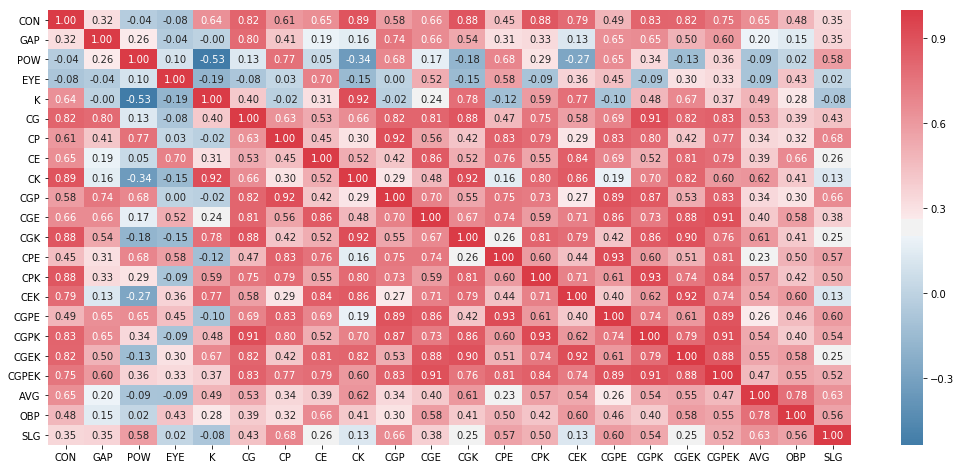

In [127]:
# Create the Datafame for correlation for our test dataset
corr_composite = eval_composite.corr(method='pearson')

# Create the layout for our graph
fig, ax = plt.subplots(figsize=(18,8))

# Style the graph to allow us to visually see the strength of the correlation
colormap = sns.diverging_palette(600,10, as_cmap=True)

# Construct the heatmap, including annotations, with a fixed 2 decimal places.
sns.heatmap(corr_composite, cmap=colormap, annot=True, fmt=".2f")

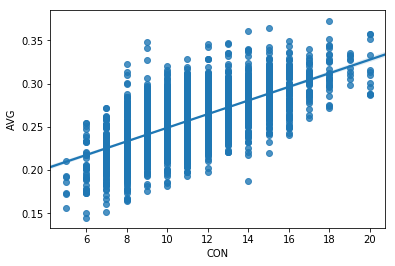

In [133]:
sns.regplot(eval_composite['CON'], eval_composite['AVG'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


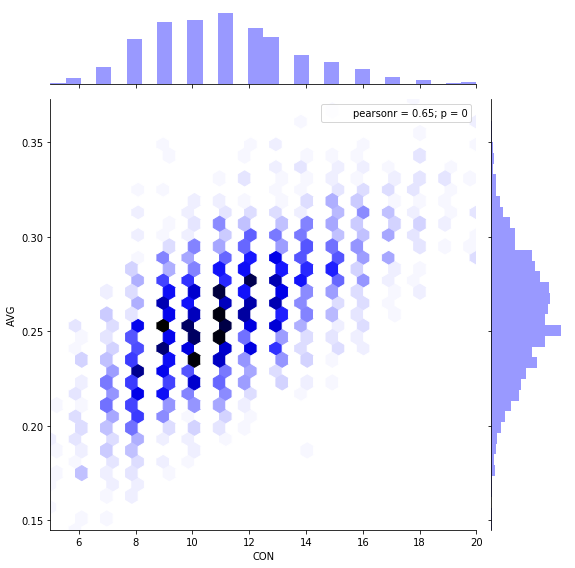

In [131]:
sns.jointplot(x="CON", y="AVG", data=eval_composite, kind="hex", color='Blue', size=8)